In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Read the data
df_regression = pd.read_csv("/content/sample_data/KingKohli.csv")
print("Data imported successfully")
df_regression.head(10)

Data imported successfully


,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,Away,18-12-2013,Drawn,Test,No,No,NaN
5,105,Not Out,New Zealand,4,4,NaN,Basin Reserve,Wellington,Away,14-02-2014,Drawn,Test,No,No,NaN
6,115,Out,Australia,4,2,NaN,Adelaide Oval,Adelaide,Away,09-12-2014,Lost,Test,No,Yes,NaN
7,141,Out,Australia,4,4,NaN,Adelaide Oval,Adelaide,Away,09-12-2014,Lost,Test,No,Yes,NaN
8,169,Out,Australia,4,2,NaN,Melbourne Cricket Ground,Melbourne,Away,26-12-2014,Drawn,Test,No,No,NaN
9,147,Out,Australia,4,2,NaN,Sydney Cricket Ground,Sydney,Away,06-01-2015,Drawn,Test,No,Yes,NaN


In [5]:
df_regression.shape

(71, 15)

In [6]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not Out       71 non-null     object 
 2   Against           71 non-null     object 
 3   Batting Order     71 non-null     int64  
 4   Inn.              71 non-null     int64  
 5   Strike Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   Column1           71 non-null     object 
 8   H/A               71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man of the Match  71 non-null     object 
 13  Captain           71 non-null     object 
 14  Unnamed: 14       0 non-null      float64
dtypes: float64(2), int64(3), object(10)
memory usage: 8.4+ KB


In [7]:
df_regression.columns

Index(['Score', 'Out/Not Out', 'Against', 'Batting Order', 'Inn.',
       'Strike Rate', 'Venue', 'Column1', 'H/A', 'Date', 'Result', 'Format',
       'Man of the Match', 'Captain', 'Unnamed: 14'],
      dtype='object')

In [8]:
df_regression.describe()

,Score,Batting Order,Inn.,Strike Rate,Unnamed: 14
count,71.000000,71.000000,71.000000,44.000000,0.0
mean,132.140845,3.521127,1.732394,114.019545,NaN
std,35.911119,0.714326,0.675230,25.257567,NaN
min,100.000000,1.000000,1.000000,84.900000,NaN
25%,107.000000,3.000000,1.000000,96.632500,NaN
50%,119.000000,3.000000,2.000000,108.935000,NaN
75%,139.500000,4.000000,2.000000,120.787500,NaN
max,254.000000,6.000000,4.000000,200.000000,NaN


In [9]:
#count na values under entire dataframe
df_regression.isna().sum()

Score                0
Out/Not Out          0
Against              0
Batting Order        0
Inn.                 0
Strike Rate         27
Venue                0
Column1              0
H/A                  0
Date                 0
Result               0
Format               0
Man of the Match     0
Captain              0
Unnamed: 14         71
dtype: int64

In [1]:
# Select relevant columns for regression
df_regression = df_regression[['Score', 'Batting Order']]

NameError: name 'df_regression' is not defined

In [11]:
#Finding correlation of Dependent & Independent Variables
df_regression.corr()

,Score,Batting Order
Score,1.000000,0.162497
Batting Order,0.162497,1.000000


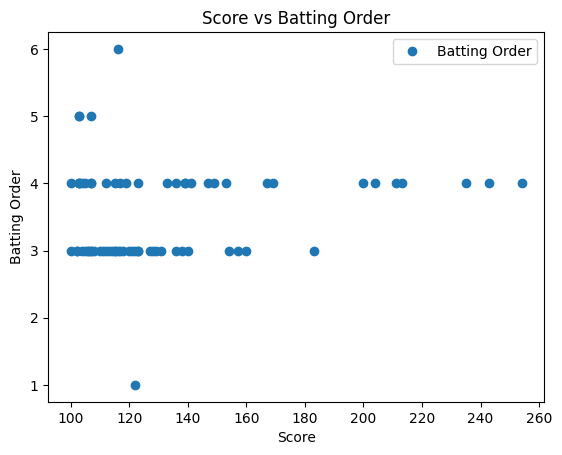

In [ ]:
# Plot the data
df_regression.plot(x="Score", y="Batting Order", style='o')
plt.title("Score vs Batting Order")
plt.xlabel("Score")
plt.ylabel("Batting Order")
plt.show()

In [19]:
# Extracting features and target variable
X = df_regression[['Score']].values
y = df_regression['Batting Order'].values

In [20]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Creating and fitting the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


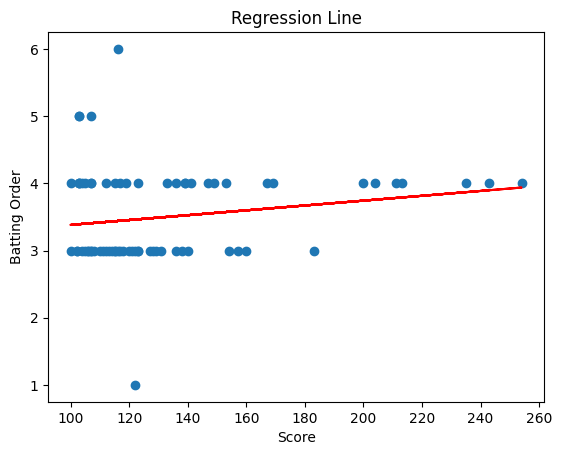

In [22]:
# Plotting the regression line
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title("Regression Line")
plt.xlabel("Score")
plt.ylabel("Batting Order")
plt.show()

In [23]:
# Predicting on test set
y_pred = regressor.predict(X_test)

In [24]:
# Comparing actual vs predicted scores
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results)

    Actual  Predicted
0        3   3.587212
1        4   3.868558
2        3   3.457360
3        3   3.453753
4        4   3.392434
5        3   3.388827
6        5   3.392434
7        3   3.388827
8        3   3.442932
9        4   3.406862
10       3   3.417683
11       4   3.529500
12       4   3.450146
13       4   3.392434
14       4   3.756741


In [25]:
regressor.score(X_train, y_train)

0.029336945966426997

In [26]:
# Evaluating the model
print("Train Score:", regressor.score(X_train, y_train))
print("Test Score:", regressor.score(X_test, y_test))

Train Score: 0.029336945966426997
Test Score: -0.019182854684864914


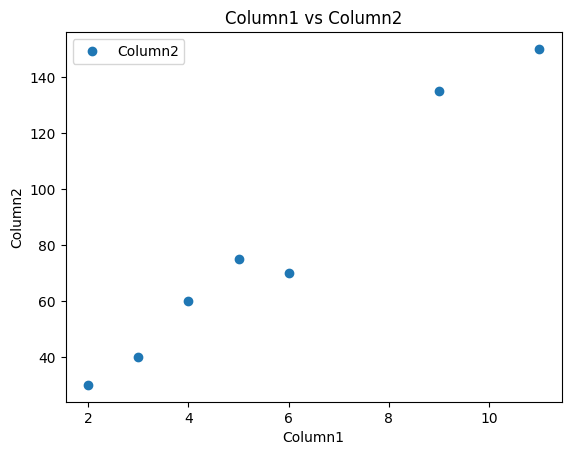

In [27]:
import pandas as pd
x=[2,4,6,11,9,3,5]
y=[30,60,70,150,135,40,75]
df=pd.DataFrame({'Column1':x,'Column2':y})
df.plot(x="Column1", y="Column2", style='o')
plt.title("Column1 vs Column2")
plt.xlabel("Column1")
plt.ylabel("Column2")
plt.show()

In [28]:
x_regression = df.iloc[:,:-1].values
y_regression = df.iloc[:,1].values

In [29]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_regression, y_regression,test_size=0.2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


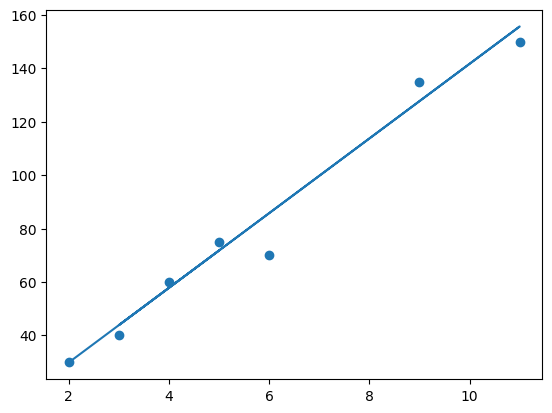

In [31]:
#Plotting the regression line y=mx+c
line = regressor.coef_*x_regression + regressor.intercept_
#plotting fot the test data
plt.scatter(x_regression, y_regression)
plt.plot(x_regression, line)
plt.show()

In [32]:
print(X_test) #testing data in hours
y_pred = regressor.predict(X_test)

[[6]
 [5]]


In [33]:
#Comparing actual vs predicted scores
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,70,85.796178
1,75,71.815287


In [34]:
regressor.score(X_train, y_train)

0.991536585616826

In [35]:
#Calculate Error in Model
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  9.490445859872615


In [38]:
print('r2 score',metrics.r2_score(y_test,y_pred))
x_axis = range(len(y_test))
x_axis
range(0, 2)


r2 score -19.772931964785606


range(0, 2)

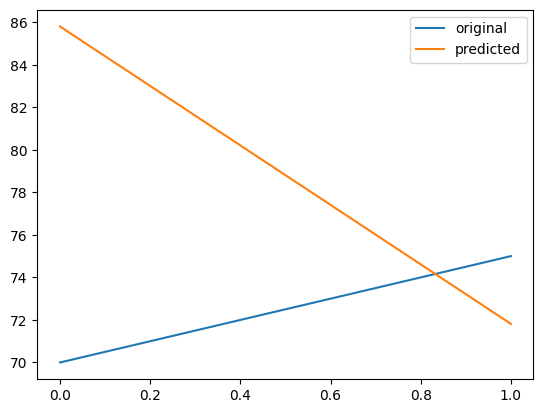

In [39]:
#Plotting the values to visualize how well our model works
plt.plot(x_axis,y_test, label='original')
plt.plot(x_axis,y_pred,label='predicted')
plt.legend()
plt.show()

Further practical is performed on another data set so make sure to add the new dataset mydata.csv in sample_data folder.


In [52]:
import pandas as pd

# Create DataFrame with the provided data
data = {
    'ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Adam', 'Steve', 'Josh', 'Joe', 'Johny', 'Marnus', 'Maxwell', 'Kane', 'Chrish', 'David'],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M'],
    'Salary': [21000, 28000, 26000, 25000, 19000, 31000, 37000, 15000, 18000, 24000],
    'Cost of Item': [15000, 16678, 23444, 16999, 21000, 84000, 69000, 12333, 15555, 11870],
    'Purchased': [0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

# Save DataFrame to CSV file
df.to_csv('/content/sample_data/MyData.csv', index=False)
print(df)


    ID     Name Gender  Salary  Cost of Item  Purchased
0  101     Adam      M   21000         15000          0
1  102    Steve      F   28000         16678          1
2  103     Josh      M   26000         23444          0
3  104      Joe      F   25000         16999          1
4  105    Johny      M   19000         21000          0
5  106   Marnus      M   31000         84000          0
6  107  Maxwell      M   37000         69000          0
7  108     Kane      M   15000         12333          0
8  109   Chrish      M   18000         15555          0
9  110    David      M   24000         11870          1


Creating inputs and output(target) and splitting the inputs and targets into trianing and testing set

In [56]:
from sklearn.model_selection import train_test_split

X = df[['Salary', 'Cost of Item']].values
Y = df[['Purchased']].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)





Performing feature scaling to get acurate result of the prediction

In [57]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)


Fitting the training sets of x_train and y_traininto logistic regression model

In [58]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(random_state=0)
lm.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [60]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

Predicting the logistic regression model


In [61]:
y_pred=lm.predict(x_test)
print(y_pred)

[0 1 0]


Printing the accuracy and confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score
print(accuracy_score(y_test,y_pred))
df_cm=cm(y_test,y_pred)
print(df_cm)




0.6666666666666666
[[2 1]
 [0 0]]


<Axes: >

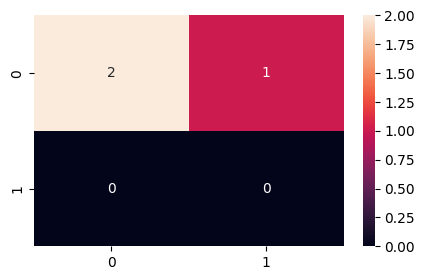

In [63]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sn.heatmap(df_cm,annot=True)